# Reynolds Mountain East
Reynolds Mountain East is located in southwestern Idaho (Reba at al., 2009, 2011, 2012, 2014; Flerchinger et al., 2012). Data from this catchment has been used to investigate the impact of different snow albedo parametrizations (Clark et al., 2015).

In this assignment, you will expand this experiment to investigate multiple subjective decisions in the snow modelling process.

## References
Clark, M. P. et al. (2015), A unified approach for process-based hydrologic modeling: 2. Model implementation and case studies, Water Resour. Res., 51, 2515–2542, doi:10.1002/2015WR017200.

Flerchinger, G. N., M. L. Reba, and D. Marks (2012), Measurement of surface energy fluxes from two Rangeland sites and comparison with a multilayer canopy model, J. Hydrometeorol., 13(3), 1038–1051, doi:10.1175/jhm-d-11-093.1

Reba, M. L., T. E. Link, D. Marks, and J. Pomeroy (2009), An assessment of corrections for eddy covariance measured turbulent fluxes over snow in mountain environments, Water Resour. Res., 45, W00d38, doi:10.1029/2008WR007045.

Reba, M. L., D. Marks, M. Seyfried, A. Winstral, M. Kumar, and G. Flerchinger (2011), A long-term data set for hydrologic modeling in a snowdominated mountain catchment, Water Resour. Res., 47, W07702, doi:10.1029/2010WR010030.

Reba, M. L., J. Pomeroy, D. Marks, and T. E. Link (2012), Estimating surface sublimation losses from snowpacks in a mountain catchment using eddy covariance and turbulent transfer calculations, Hydrol. Processes, 26(24), 3699–3711, doi:10.1002/hyp.8372.

Reba, M. L., D. Marks, T. E. Link, J. Pomeroy, and A. Winstral (2014), Sensitivity of model parameterizations for simulated latent heat flux at the snow surface for complex mountain sites, Hydrol. Processes, 28(3), 868–881, doi:10.1002/hyp.9619.

<br>

## Model setup
First, we'll need to setup a pysumma simulation object. We'll use the `constantDecayRate` object from notebook 1b as our default simulation.

In [1]:
# modules 
import os
import pysumma as ps
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# SUMMA.exe location
executable = '/work/TALC/enci619.05_2024w/local/bin/summa.exe'

In [3]:
os.environ['LD_LIBRARY_PATH'] = '/global/software/netcdf/netcdfc-4.7.3_gnu730_hdf51105_openmpi402gnu730/lib:/global/software/hdf5/hdf5-1.10.5_gnu730_openmpi402gnu730/lib:/global/software/openmpi/openmpi-4.0.2_gnu730/lib:/global/software/gcc/gcc-7.3.0/lib64:/global/software/gcc/gcc-7.3.0/lib:/global/software/python/3.10.4/lib/:/work/TALC/enci619.05_2024w/local/lib64'
print(os.environ['LD_LIBRARY_PATH'])

/global/software/netcdf/netcdfc-4.7.3_gnu730_hdf51105_openmpi402gnu730/lib:/global/software/hdf5/hdf5-1.10.5_gnu730_openmpi402gnu730/lib:/global/software/openmpi/openmpi-4.0.2_gnu730/lib:/global/software/gcc/gcc-7.3.0/lib64:/global/software/gcc/gcc-7.3.0/lib:/global/software/python/3.10.4/lib/:/work/TALC/enci619.05_2024w/local/lib64


In [4]:
# Define location of .exe and file manager
file_manager_constant = './settings/reynolds/summa_fileManager_reynoldsConstantDecayRate.txt'

In [5]:
# Open pysumma simulation object
s_constant = ps.Simulation(executable, file_manager_constant)

In [6]:
# Make the output directory if it doesn't exist
if not os.path.exists(s_constant.manager['outputPath'].value):
    os.makedirs(s_constant.manager['outputPath'].value)

<br>

## Assignment - subjective decisions in snow modelling
The image below is slightly adapted from a presentation given by Prof. Clark on April 27th, 2017, at the European Geosciences Union General Assembly in Vienna. The image outlines where subjective decisions about parametrizations are made in the snow modelling processes. In this assigment you can investigate the impact of these decisions on the simulations in Reynolds Mountain East.

<div>
<img src="./img/snow-decisions.png" width="750"/>
</div>

### Note on pysumma
In the following, you are asked to change certain values in your pysumma setup. Keep in mind that if you make these changes in the input files in the `settings` folder, you will need to make a new pysumma simulation object to have these changes take effect (`s_constant = ps.Simulation(executable, file_manager_constant)`). If you instead make the changes to an existing pysumma simulation object, make sure to reset your pysumma simulation object to its base state after each simulation (`s_constant.reset()`) so that your changes don't accumulate. 

### Note on finding simulated snow depth
In the following exercises, you are asked to investigate the impact of certain modelling options on snow depth simulations.
A time series of simulated snow depth values can be found in the output `.nc` file as variable `scalarSnowDepth`. You can find the location and name of the output `.nc` file by checking the `manager` option of your pysumma object (e.g. `print(s_constant.manager)`).

If you want to assess the impact on other simulations variables, you can either select those from the output `.nc` file that gets generated by default, or you can adapt the `Model_Output.txt` file in the `./settings/reynolds/` folder. Re-create your pysumma object afterwards to process changes to the `.txt`! See the SUMMA documentation for further guidance: https://summa.readthedocs.io/en/latest/input_output/SUMMA_input/#output-control-file

<br>
<br>

### Exercise 1: Precipitation partitioning
Precipitation partitioning in rain and snow is determined by the wet bulb temperature of incoming precipitation. SUMMA has two different parameters that control this process (see the `summa_zLocalParamInfo.txt` file in the `settings` folder; note that the minimum and maximum columns are current not used by SUMMA but are already implemented for future development):

| Parameter                 | Value        | Min range    | Max range    | Unit | Description
| :-|:-|:-|:-|:-|:-
| tempCritRain              |     273.1600 |     272.1600 |     274.1600 | K | Critical temperature for rainfall, if wet bulb temperature is > `tempCritRain` precipitation occurs as rain  
| tempRangeTimestep         |       2.0000 |       0.5000 |       5.0000 | K | Specifies a range around the wet bulb temperature and used to calculate the percentage of precipitation as rain

Use your knowledge of pysumma to:
- Change the value of the `tempCritRain` parameter 
- Run the simulation for Reynolds Mountain East with this new parameter value
- Repeat this with several different values for `tempCritRain`
- Make a graph to show the difference in snow depth simulation and comment on what you see

As an example for the remainder of this exercise, code to run the required simulations for Exercise 1 is provided below. All that's left to complete this exercise is to run the code blocks below and to comment on the differences in snow depth simulation you see. 

<br>

#### Exercise 1: Answers

In [7]:
# Define the test values
trial_tempCritRain = [272.14,273.14,274.14]

# Do the simulations
for value in trial_tempCritRain:
    
    # restore the original settings of the simulation object
    s_constant.reset()
    
    # Change the value
    s_constant.global_hru_params['tempCritRain'] = value
    
    # Run the model
    s_constant.run('local', run_suffix='tempCritRain_'+str(int(value)))
    print(s_constant.status)

Success
Success
Success


In [8]:
# prepare the plot
output_files = ['./output/reynolds/reynolds_tempCritRain_272_timestep.nc',
                './output/reynolds/reynolds_tempCritRain_273_timestep.nc',
                './output/reynolds/reynolds_tempCritRain_274_timestep.nc']
labels = ['Tc = -1', 'Tc = 0', 'Tc = +1']

In [9]:
# Auxiliary function to load and plot data
# This function collects a few plotting commands that need to be repeated to plot each simulation result in a single figure.

def aux_plot(var,files,labels):
    
    idx = 0 # label counter
    
    for file in files:
        
        # load data
        ds = xr.open_dataset(file).isel(hru=0, gru=0).load() # pre-select the single hru and gru that are within the data
        
        # Drop missing data
        ds = ds.where(ds['mLayerDepth'] != -9999, drop=True)
        
        # Plot
        plt.plot(ds['time'],ds[var].max(dim='midToto'),label=labels[idx]);
        
        # Increment counter
        idx +=1

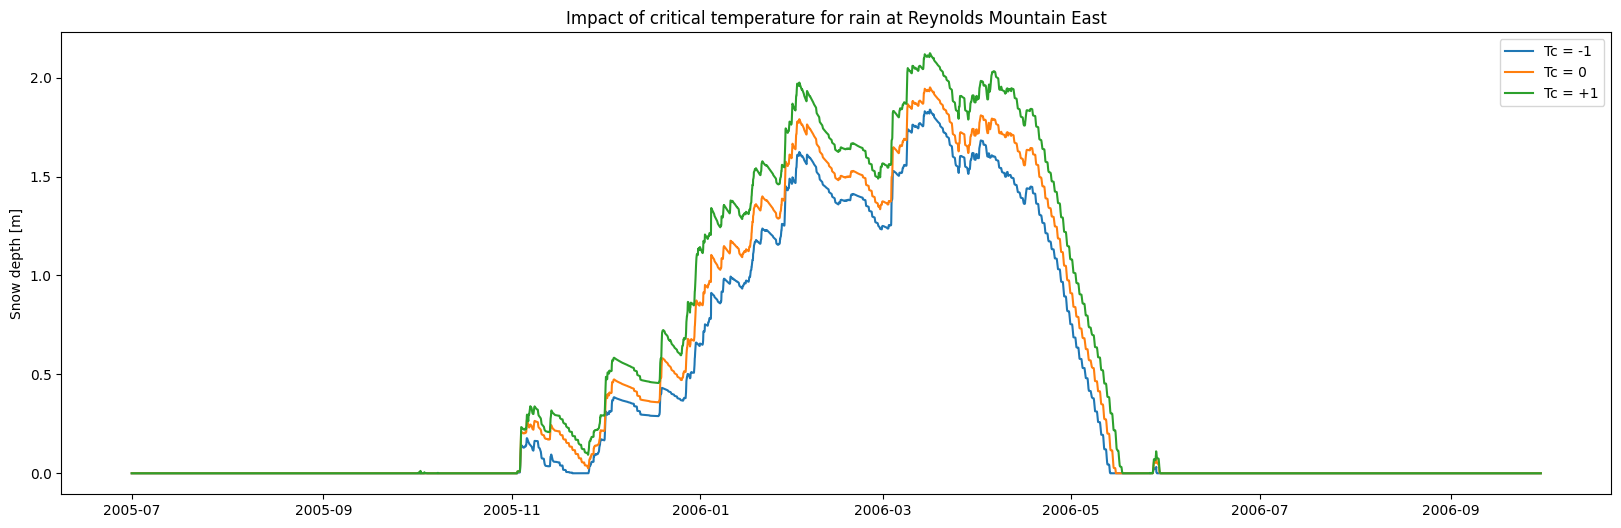

In [10]:
# Make the plot
plt.figure(figsize=(20,6))
aux_plot('scalarSnowDepth',output_files,labels)
plt.legend()
plt.title('Impact of critical temperature for rain at Reynolds Mountain East')
plt.ylabel('Snow depth [m]');

<br>
<br>

### Exercise 2: Drainage of liquid water from the snow pack
The storage and transmission of liquid water in the snow pack is parametrized as gravity drainage with the following formula:

\begin{equation}
q=k\left(\frac{\theta_{liq}-\theta_{res}}{\phi-\theta_{res}}\right)^c
\end{equation}

Where $q$ is the drainage flux, $k$ conductivity of the snow pack [m s-1], $\theta_{liq}$ the current volumetric water content [-],  $\theta_{res}$ the residual volumetric water content [-], $\phi$ the available fractional pore space [-] and $c$ a non-linearity coefficient [-]. In SUMMA, the following three parameters control this process:

| Parameter                 | Value        | Min range    | Max range    | Unit | Description
| :-|:-|:-|:-|:-|:-
| Fcapil                    |       0.0400 |       0.0100 |       0.1000 | -    | Capillary retention as a fraction of the total pore volume, used to compute $\theta_{res}$
| k_snow                    |       0.1979 |       0.0050 |       0.0500 | m s-1| Hydraulic conductivity of snow; $k$ in the equation above
| mw_exp                    |       3.0000 |       1.0000 |       5.0000 | -    | Exponent for meltwater flow; $c$ in the equation above

Use your knowledge of pysumma to:
- Change the value of these three parameters to reflect different drainage scenarios
- Run the simulation for Reynolds Mountain East with this new parameter values
- Repeat this with several different drainage scenarios
- Make a graph to show the difference in snow depth simulation and comment on what you see

<br>

<br>

### Exercise 3: Thermal conductivity of snow
Multiple parametrizations for the thermal conductivity of snow exist, typically derived from the estimated bulk density of ice. This modelling decision is called `thCondSnow` in the SUMMA decision file.

Use your knowledge of pysumma to:
- Find out what the available parametrizations for `thCondSnow` are
- Run the simulations for Reynolds Mountain East with the available parametrizations
- Make a graph to show the differences in simulated snow depth and comment on the sensitivities

<br>
<br>

### Exercise 4: Atmospheric stability
Multiple parametrizations for atmospheric stability exist, which are used to determine the stability correction for the turbulent exchange coefficient. This modelling decision is called `astability` in the SUMMA decision file and three options are available. Parametrization option `mahrtexp` describes an exponential relation between the Richardson number and stability correction factor, controlled by parameter `Mahrt87_eScale`.  

| Parameter                 | Value        | Min range    | Max range    | Unit | Description
| :-|:-|:-|:-|:-|:-
Mahrt87_eScale            |       1.0000 |       0.5000 |       2.0000 | - | exponential scaling factor in the Mahrt (1987) stability function


Use your knowledge of pysumma to:
- Find out what the available parametrizations for `astability` are
- Run the simulations for Reynolds Mountain East with the available parametrizations
- Vary the `Mahrt87_eScale` parameter to assess its sensitivity
- Make a graph to show the differences in simulated snow depth and comment on the sensitivities